In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

### DARK images (shutter on)

#### framrate = 10fps, readout-mode = CDS, bias correction ON
#### sensor temperature = 33.52°C

# Medium gain

In [2]:
cube_1 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_0.0491ms.fit')
cube_2 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_9.997ms.fit')
cube_3 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_19.999ms.fit')
cube_4 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_29.998ms.fit')
cube_5 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_39.997ms.fit')
cube_6 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_49.999ms.fit')
cube_7 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_59.998ms.fit')
cube_8 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_70.000ms.fit')
cube_9 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_79.999ms.fit')
cube_10 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_89.999ms.fit')
cube_11 = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_99.995ms.fit')

In [3]:
mean_1 = np.mean(cube_1, axis=0)
mean_2 = np.mean(cube_2, axis=0)
mean_3 = np.mean(cube_3, axis=0)
mean_4 = np.mean(cube_4, axis=0)
mean_5 = np.mean(cube_5, axis=0)
mean_6 = np.mean(cube_6, axis=0)
mean_7 = np.mean(cube_7, axis=0)
mean_8 = np.mean(cube_8, axis=0)
mean_9 = np.mean(cube_9, axis=0)
mean_10 = np.mean(cube_10, axis=0)
mean_11 = np.mean(cube_11, axis=0)

In [4]:
var_1 = np.var(cube_1, axis=0)
var_2 = np.var(cube_2, axis=0)
var_3 = np.var(cube_3, axis=0)
var_4 = np.var(cube_4, axis=0)
var_5 = np.var(cube_5, axis=0)
var_6 = np.var(cube_6, axis=0)
var_7 = np.var(cube_7, axis=0)
var_8 = np.var(cube_8, axis=0)
var_9 = np.var(cube_9, axis=0)
var_10 = np.var(cube_10, axis=0)
var_11 = np.var(cube_11, axis=0)

#### Mean vs. int time

slope = 94.16691115240168 [ADU/ms]


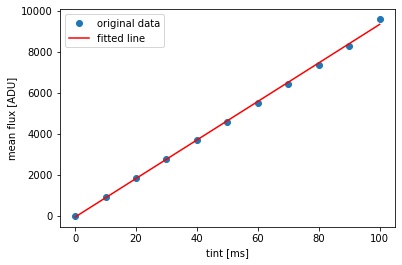

In [5]:
mean_arr = np.array([ np.median(mean_1), np.median(mean_2), np.median(mean_3), np.median(mean_4), 
                    np.median(mean_5), np.median(mean_6), np.median(mean_7), np.median(mean_8), 
                    np.median(mean_9), np.median(mean_10), np.median(mean_11)])
tint = np.array([0.05, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
line = linregress(tint, mean_arr)
plt.plot(tint, mean_arr, 'o', label='original data')
plt.plot(tint, line.intercept + line.slope*tint, 'r', label='fitted line')
plt.ylabel('mean flux [ADU]')
plt.xlabel('tint [ms]')
plt.legend()
print('slope = %s [ADU/ms]'%line.slope)

#### Variance vs. int time

slope = 11.070525165317886 [ADU²/ms]


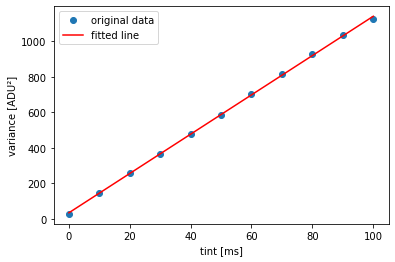

In [6]:
var_arr = np.array([ np.median(var_1), np.median(var_2), np.median(var_3), np.median(var_4), 
                    np.median(var_5), np.median(var_6), np.median(var_7), np.median(var_8), 
                    np.median(var_9), np.median(var_10), np.median(var_11)])
tint = np.array([0.05, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
line = linregress(tint, var_arr)
plt.plot(tint, var_arr, 'o', label='original data')
plt.plot(tint, line.intercept + line.slope*tint, 'r', label='fitted line')
plt.ylabel('variance [ADU\u00b2]')
plt.xlabel('tint [ms]')
plt.legend()
print('slope = %s [ADU\u00b2/ms]'%line.slope)

#### Variance vs. mean

1/slope = 8.518302660508551 1/[ADU]


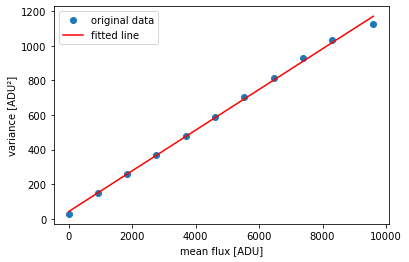

In [7]:
line = linregress(mean_arr, var_arr)
plt.plot(mean_arr, var_arr, 'o', label='original data')
plt.plot(mean_arr, line.intercept + line.slope*mean_arr, 'r', label='fitted line')
plt.ylabel('variance [ADU\u00b2]')
plt.xlabel('mean flux [ADU]')
plt.legend()
print('1/slope = %s 1/[ADU]'%(1/line.slope))

## Gain Calculation

#### Variance vs. mean

In [8]:
x = np.arange(0, cube_1.shape[0])
y = np.arange(0, cube_1.shape[1])
gain = np.zeros((len(x),len(y)))
for i in x:
    for j in y:
        var_arr = np.array([var_1[i,j], var_2[i,j], var_3[i,j], var_4[i,j], var_5[i,j], var_6[i,j], 
                            var_7[i,j], var_8[i,j], var_9[i,j], var_10[i,j], var_11[i,j]])
        mean_arr = np.array([mean_1[i,j], mean_2[i,j], mean_3[i,j], mean_4[i,j], mean_5[i,j], mean_6[i,j], 
                            mean_7[i,j], mean_8[i,j], mean_9[i,j], mean_10[i,j], mean_11[i,j]])
        res = linregress(mean_arr, var_arr)
        m = res.slope
        gain[i,j] = 1/m

(array([3.4000e+01, 3.3000e+01, 4.7000e+01, 7.4000e+01, 1.1600e+02,
        5.7700e+02, 4.8000e+03, 1.5786e+04, 1.7441e+04, 8.1640e+03,
        2.0750e+03, 4.1800e+02, 1.3800e+02, 1.4100e+02, 1.6500e+02,
        1.5300e+02, 1.0200e+02, 6.7000e+01, 3.5000e+01, 3.4000e+01,
        2.0000e+01, 2.7000e+01, 2.4000e+01, 5.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 24 artists>)

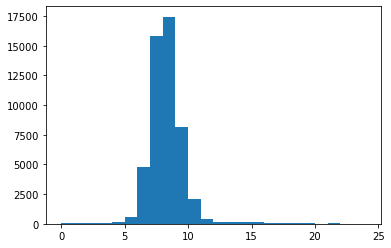

In [9]:
plt.hist(gain.flat, bins=np.arange(0, 25, 1))

In [10]:
gain = np.median(gain, axis = None)
print('Gain = %s e-/ADU'%(gain))

Gain = 8.208027562421691 e-/ADU


## Dark current

In [11]:
x = np.arange(0, cube_1.shape[0])
y = np.arange(0, cube_1.shape[1])
dc = np.zeros((len(x),len(y)))
for i in x:
    for j in y:
        mean_arr = np.array([mean_1[i,j], mean_2[i,j], mean_3[i,j], mean_4[i,j], mean_5[i,j], mean_6[i,j], 
                            mean_7[i,j], mean_8[i,j], mean_9[i,j], mean_10[i,j], mean_11[i,j]])
        tint = np.array([0.05, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
        res = linregress(tint, mean_arr)
        m = res.slope
        dc[i,j] = m

In [12]:
dc = np.mean(dc, axis = None) #in ADU/ms/pix
dc = dc*gain # in ke-/s/pix
print('Darrk current = %s ke-/s/pix'%(dc))

Darrk current = 737.7538658903981 ke-/s/pix


## Readout noise

In [13]:
bias_img = fits.getdata('G:/CRED3/20210607/10fps/med-gain/20210307_10fps_0.0491ms_biasimg.fit')
var = np.var(bias_img, axis=0)
ron = np.sqrt(np.median(var)) # in ADU
ron = ron*gain
print('Readout noise = %s e-'%(ron))

Readout noise = 43.902667043499726 e-
